In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time

# Load your dataset
df = pd.read_csv('./processed_dataset_2.0.csv')  # Load your data

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target

In [3]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Standardize the data for SVR (SVR performs better with standardized features)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y for scaling

split_index = int(0.8 * len(df))
# Split the dataset into training and testing parts
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the SVR model
svr_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is common for SVR
start_time = time.time()
svr_model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time
# Predict on the training data
y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Inverse transform to original scale

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Duration: {duration}s")

ValueError: Found input variables with inconsistent numbers of samples: [44, 9]

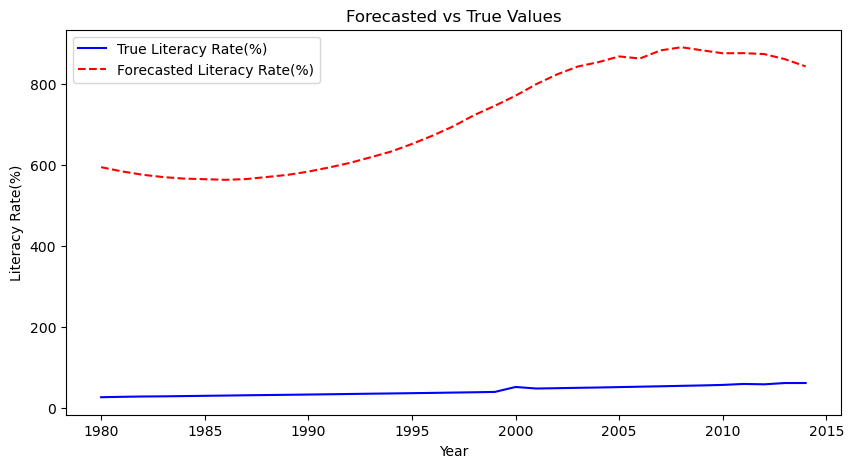

In [7]:
y_pred_scaled = svr_model.predict(X_train)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Inverse transform to original scale
# Plot predictions vs true values for the test dataset
plt.figure(figsize=(10, 5))
plt.plot(df['Year'][:split_index], y_train.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

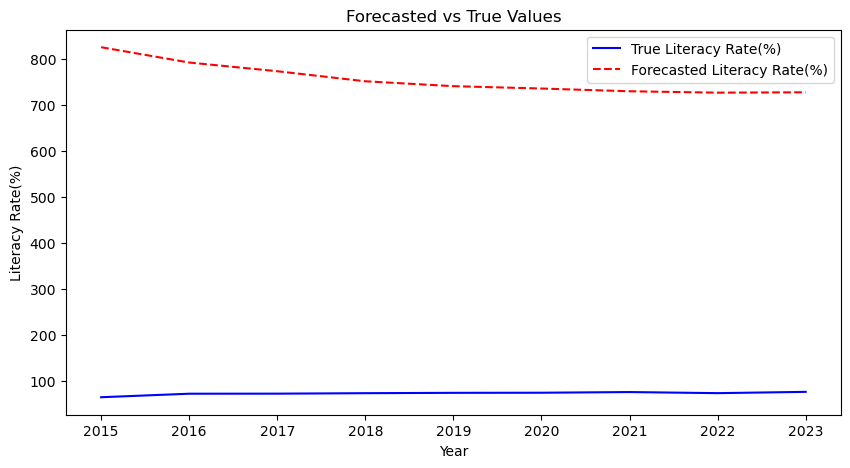

In [5]:
# Plot predictions vs true values for the test dataset
plt.figure(figsize=(10, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

Test R-squared (R2 Score): -1.79
Test Mean Squared Error (MSE): 29.09
Test Mean Absolute Error (MAE): 4.04
Training Duration: 0.002711057662963867 seconds


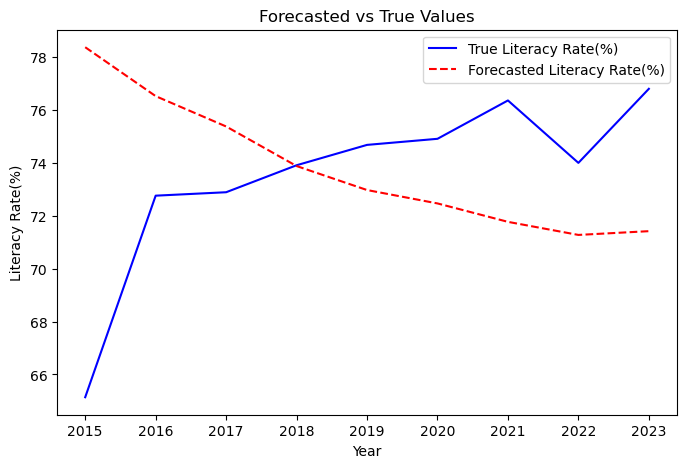

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Load dataset (use your data here)
df = pd.read_csv('./processed_dataset_2.0.csv')

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target

# Define your split index
split_index = int(0.8 * len(df))

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing parts
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize the Support Vector Regressor model
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Train the model
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time

# Make predictions on the test set
y_pred_test = model.predict(X_test) + 30  # Adding a custom bias

# Calculate performance metrics
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")

# Plot predictions vs true values for the test dataset
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()
